In [8]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
CSV3_PATH = "/home/skela/Documents/WORKSPACE/software/test/SynteticTraceGenerator/SynteticTraceGenerator/simulations/Villarosa_edge/res/mec_3ue.csv"
CSV1_PATH = "/home/skela/Documents/WORKSPACE/software/test/SynteticTraceGenerator/SynteticTraceGenerator/simulations/Villarosa_edge/res/mec_1ue.csv"

In [5]:
table_3ue = pd.read_csv(CSV3_PATH)
table_1ue = pd.read_csv(CSV1_PATH)

In [42]:
table_3ue

,timestamp,vehicle_id,packet_size,e2e_delay,service_time
0,1.154000,10.0.0.1,29,1.012000e-07,0.180346
1,1.154000,10.0.0.2,29,1.012000e-07,0.367159
2,1.154000,10.0.0.3,29,1.012000e-07,0.071777
3,1.310002,10.0.0.2,1011,8.868000e-07,0.065275
4,1.323002,10.0.0.2,915,8.100000e-07,0.161872
...,...,...,...,...,...
1015,110.415003,10.0.0.3,1073,9.364000e-07,0.558427
1016,110.746003,10.0.0.2,996,8.748000e-07,0.188448
1017,110.798002,10.0.0.1,834,7.452000e-07,0.229579
1018,110.901003,10.0.0.1,1058,9.244000e-07,0.009180


In [7]:
table_1ue

,timestamp,vehicle_id,packet_size,e2e_delay,service_time
0,1.154000,10.0.0.1,29,1.012000e-07,0.053356
1,1.964002,10.0.0.1,1011,8.868000e-07,0.075238
2,3.095002,10.0.0.1,915,8.100000e-07,0.067460
3,3.327002,10.0.0.1,1092,9.516000e-07,0.010443
4,4.575002,10.0.0.1,916,8.108000e-07,0.040311
...,...,...,...,...,...
106,109.417003,10.0.0.1,1073,9.364000e-07,0.101585
107,109.903002,10.0.0.1,899,7.972000e-07,0.194696
108,110.213003,10.0.0.1,1080,9.420000e-07,0.267899
109,110.319003,10.0.0.1,1079,9.412000e-07,0.033391


In [149]:
# def calculate_arrivals_histogram(table, unit_time=1):
#     packet_per_unit_time = [0]*len(table)
#     time_counter = 0
#     timeslot_counter = 0
    
#     for i in table['timestamp']:
#         # print(time_counter + unit_time - 1e-007)
#         isInserted = False
#         while not isInserted:
#             print("i: {}, left {} - rigth {}".format(i, time_counter, (time_counter + unit_time - 1e-007)))
#             if time_counter <= i and i <= (time_counter + unit_time - 1e-007):
#                 print("{} <= i <= {}".format(time_counter, (time_counter + unit_time - 1e-007)))
#                 packet_per_unit_time[timeslot_counter] += 1
#                 isInserted = True
#             else:    
#                 time_counter += (time_counter + unit_time - 1e-007)
#                 timeslot_counter += 1
            
#     return packet_per_unit_time

import math
from collections import Counter
    
def calculate_arrivals_histogram(table):
    packets_timeslot = [math.trunc(i) for i in table['timestamp']]
    count_packet_per_timeslot = Counter(packets_timeslot)
    total_packets = len(table['timestamp'])

    arrivals_histogram = [0] * (max(count_packet_per_timeslot.values()) + 1)

    a = list(count_packet_per_timeslot.values())
    a.sort()
    count = Counter(a)
    for k in count:
        arrivals_histogram[k] = k*count[k]
        arrivals_histogram[k] /= total_packets
    return arrivals_histogram

In [174]:
from matplotlib.ticker import MaxNLocator
import numpy as np

def bar(ydata, xdata=[], title="", xlabel="", ylabel="", save_path=""):
    plt.rcParams.update({'font.size': 22})
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax.grid(True)
    offset = 0.0
    for k in ydata:
        ax.bar(np.array(xdata if len(xdata) else list(range(len(ydata[k])))) + offset, ydata[k], label=k, width=0.25)
        offset += 0.25

    totals = []
    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x() - .03, i.get_height(),
                str(round((i.get_height()), 2)) + '%', fontsize=15, color='black', rotation=45)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [176]:
tre_ue_arrivals_histogram = calculate_arrivals_histogram(table_3ue)
uno_ue_arrivals_histogram = calculate_arrivals_histogram(table_1ue)

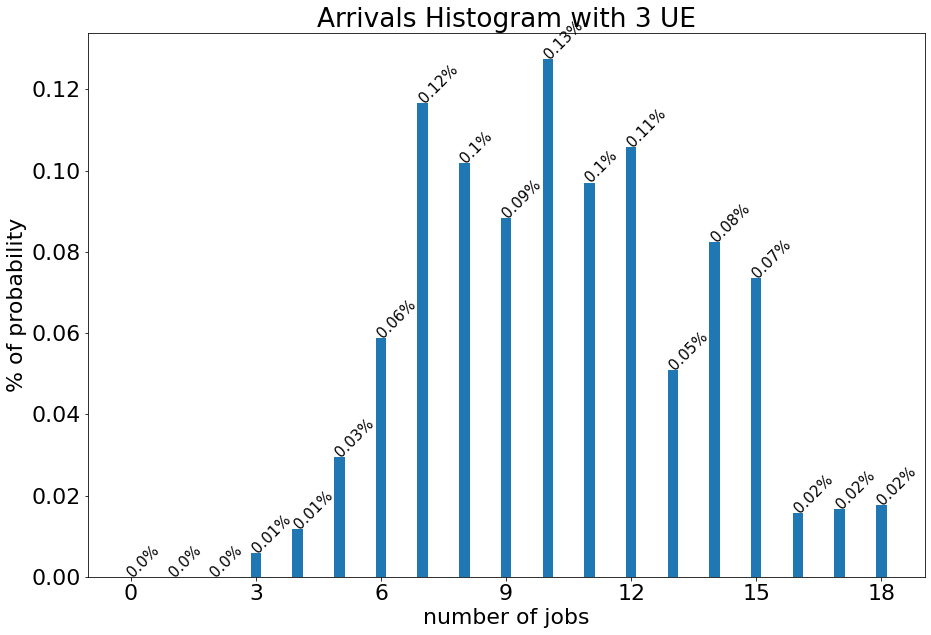

In [177]:
bar(ydata={"arrivals": tre_ue_arrivals_histogram},
    xlabel="number of jobs", ylabel="% of probability",
    title="Arrivals Histogram with 3 UE")

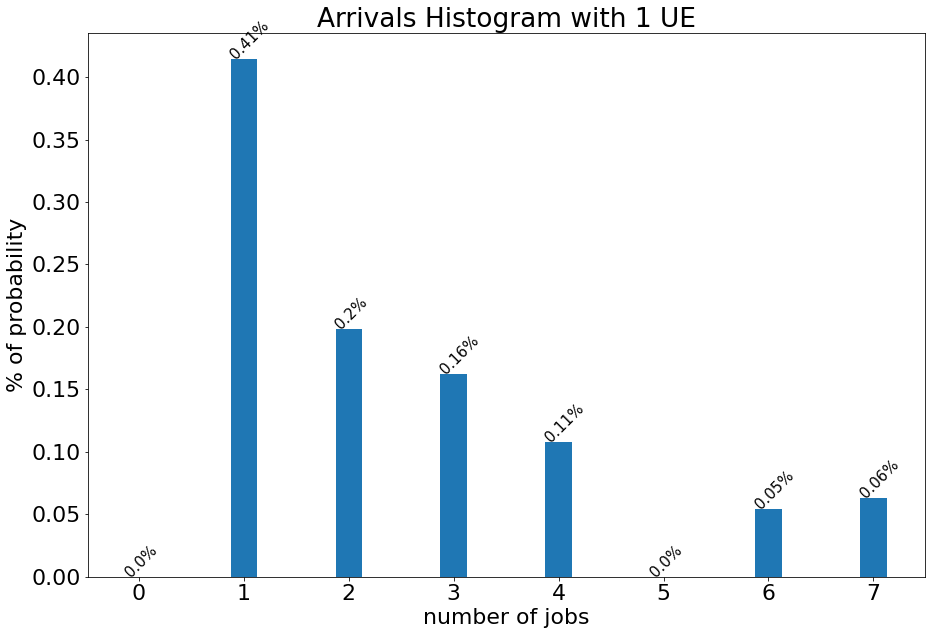

In [178]:
bar(ydata={"arrivals": uno_ue_arrivals_histogram},
    xlabel="number of jobs", ylabel="% of probability",
    title="Arrivals Histogram with 1 UE")